# Convolutional Neural Networks

Architecture to leverage properties of natural signal

In [1]:
import torch

We are learning *kernels* that we *convolve* through the image, from top left to bottom right.

<center>
    <img src='images/correlation.svg' />
    <p>Source: <a href='http://d2l.ai'>d2l.ai</a></p>
</center>


Output here: $(1\times1+2\times2+4\times3+5\times4)+(0\times0+1\times1+3\times2+4\times3)=56$

As we are sliding with a window, the output size is usually smaller than the input size because of the border. If desired, we can avoid this phenomenon by *padding* with 0 the input. To get an output of the same size as the input we set the padding value of `kernel_size - 1`  
A bias is added to the convolution to obtain an affine transformation  
We usually set kernel size to have odd values (3, 5, or 7)

<center>
    <img src='images/2D_Convolution_Animation.gif' />
    <p>Source: <a href='https://de.wikipedia.org/wiki/Convolutional_Neural_Network'>Wikipedia</a></p>
</center>

In [2]:
in_channels = 3
out_channels = 8
kernel_size = (3, 3)
# https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, bias=True, padding_mode='zeros')

Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1))

To reduce the amount of data and improve the translation invariance property of our network, after a convolution layer, we apply a pooling layer that aggregate pixel value together  
One common pooling layer is the **MaxPooling** layer. Pooling layers don't have any learnable weights.

In [3]:
kernel_size= (2, 2)
torch.nn.MaxPool2d(kernel_size)

MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)

<center>
    <img src='images/Typical_cnn.png' />
    <p>Source: <a href='https://en.wikipedia.org/wiki/Convolutional_neural_network'>Wikipedia</a></p>
</center>

Usually as we go deeper in the neural network, we increase the channel dimension and downsample the features maps

**Receptive field of a CNN**: The region of the input space that affects a particular unit of the network

What is the best way to increase the maximum receptive field of a CNN?:
* Increase the size of each kernel
* Increase the depth of the CNN

Application of CNNs are not restricted to images, they are widely used in audio (with 1d convolution) and until recently it was also sometimes applied to text classification

**One surprising application of CNN**: detect [software malwares](https://arxiv.org/abs/2010.16108) with a very high accuracy (90%) by transforming the source code into images

# Visualize the impact of convolution

Taken form Tensorflow's course, copyright 2019 The TensorFlow authors under Apache License

In [4]:
!pip install scipy
!pip install opencv-python
import cv2
import numpy as np
from scipy import misc
i = misc.ascent()

Next, we can use the pyplot library to draw the image so we know what it looks like.

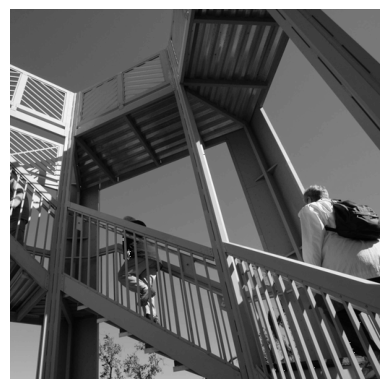

In [5]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

The image is stored as a numpy array, so we can create the transformed image by just copying that array. Let's also get the dimensions of the image so we can loop over it later. 

In [6]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

Now we can create a filter as a 3x3 array. 

In [7]:
#Experiment with different values for fun effects.
filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]
#filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
#filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
#filter = [ [0,-1,0], [-1,4,-1], [0,-1,0]]

Now let's create a convolution. We will iterate over the image, leaving a 1 pixel margin, and multiply out each of the neighbors of the current pixel by the value defined in the filter. 

i.e. the current pixel's neighbor above it and to the left will be multiplied by the top left item in the filter etc. etc. We'll then multiply the result by the weight, and then ensure the result is in the range 0-255

Finally we'll load the new value into the transformed image. 

In [8]:
weight  = 1
for x in range(1,size_x-1):
    for y in range(1,size_y-1):
        convolution = 0.0
        convolution = convolution + (i[x - 1, y-1] * filter[0][0])
        convolution = convolution + (i[x, y-1] * filter[0][1])
        convolution = convolution + (i[x + 1, y-1] * filter[0][2])
        convolution = convolution + (i[x-1, y] * filter[1][0])
        convolution = convolution + (i[x, y] * filter[1][1])
        convolution = convolution + (i[x+1, y] * filter[1][2])
        convolution = convolution + (i[x-1, y+1] * filter[2][0])
        convolution = convolution + (i[x, y+1] * filter[2][1])
        convolution = convolution + (i[x+1, y+1] * filter[2][2])
        convolution = convolution * weight
        if(convolution<0):
            convolution=0
        if(convolution>255):
            convolution=255
        i_transformed[x, y] = convolution

Now we can plot the image to see the effect of the convolution!

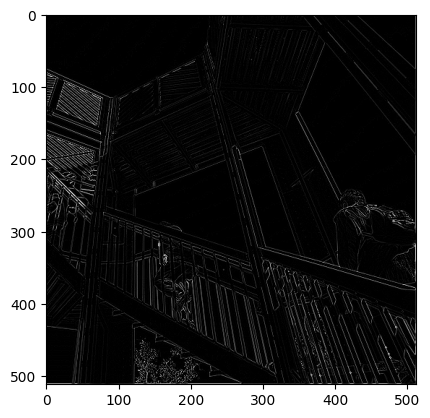

In [9]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
plt.show()   

After 2x2 max pooling layer. Notice the impact on the image size.

In [10]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
    for y in range(0, size_y, 2):
        pixels = []
        pixels.append(i_transformed[x, y])
        pixels.append(i_transformed[x+1, y])
        pixels.append(i_transformed[x, y+1])
        pixels.append(i_transformed[x+1, y+1])
        newImage[int(x/2),int(y/2)] = max(pixels)

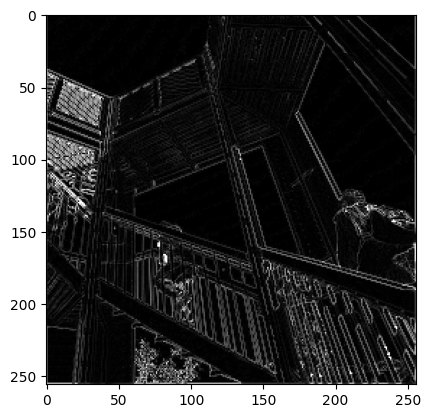

In [11]:
# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
plt.show()